

# Discrete functional decoding

Perform meta-analytic functional decoding on regions of interest.

We can use the methods in ``nimare.decode.discrete`` to apply functional
characterization analysis to regions of interest or subsets of the Dataset.


### 创建ROI图像

根据元分析结果得到的解剖区域创建ROI。

疾病组： 创建一个brain mask：
- Frontal pole （-6，58，18）

健康组： 创建五个brain mask
- Paracingulate Gyrus （0，48，8）
- Frontal Orbital Cortex （-38，24，-14）
- Cingulate Gyrus posterior division （-2，-54，26）
- Angular Gyrus （-44, -58，24）
- Frontal Orbital Cortex （32， 18, -18）

In [1]:
from nilearn import image
import numpy as np


In [18]:
# 加载 疾病组的 Z 值图像
z_img_patients = image.load_img('../results/ale/patient_z.nii.gz')

# 设置阈值，选择激活区域
# Z>3.1 对应 P<0.001
threshold = 3.1
z_data = z_img_patients.get_fdata()


In [19]:
# 加载 控制组的 Z 值图像
z_img_controls = image.load_img('../results/ale/control_all_z.nii.gz')

# 设置阈值，选择激活区域
# Z>3.1 对应 P<0.001
threshold = 3.1
z_data = z_img_controls.get_fdata()

/var/folders/yk/78rqxlxn4pz_rsb5_31xvh340000gn/T/ipykernel_48380/1359183156.py:6: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  roi_img_controls = image.new_img_like(z_img_controls, roi_data)


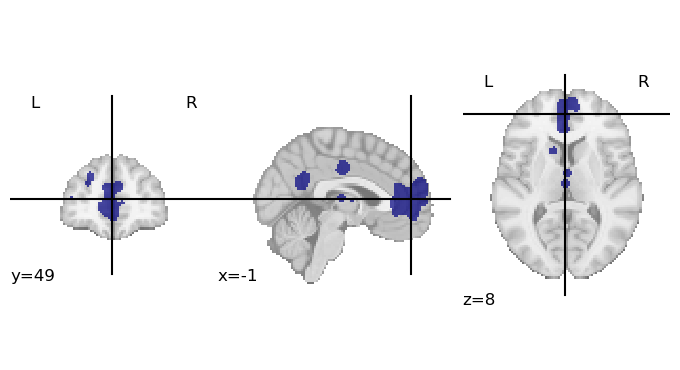

In [ ]:
import matplotlib.pyplot as plt
# 创建一个二进制掩模，只选择 Z 值大于阈值的区域
roi_data = np.where(z_data > threshold, 1, 0)

# 生成新的 ROI 图像
roi_img_controls = image.new_img_like(z_img_controls, roi_data)

# 可视化 ROI 图像
from nilearn.plotting import plot_roi
plot_roi(roi_img_controls)


/var/folders/yk/78rqxlxn4pz_rsb5_31xvh340000gn/T/ipykernel_48380/1508146768.py:2: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  roi_img_patients = image.new_img_like(z_img_patients, roi_data)


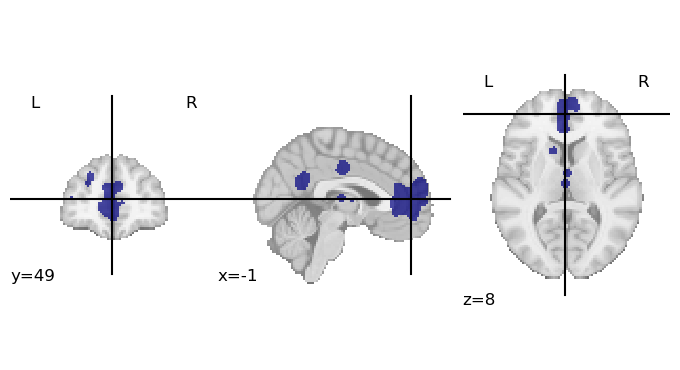

In [27]:
# 生成新的 ROI 图像
roi_img_patients = image.new_img_like(z_img_patients, roi_data)

# 可视化 ROI 图像
from nilearn.plotting import plot_roi
plot_roi(roi_img_patients)

In [8]:
import os
import nibabel as nib
import numpy as np
from nilearn.plotting import plot_roi

from nimare.dataset import Dataset
from nimare.decode import discrete
from nimare.utils import get_resource_path

## Load dataset with abstracts
We'll load a small dataset composed only of studies in Neurosynth with
Angela Laird as a coauthor, for the sake of speed.



In [22]:
dset = Dataset(os.path.join(get_resource_path(), "neurosynth_laird_studies.json"))
dset.annotations.head(5)

,id,study_id,contrast_id,Neurosynth_TFIDF__001,Neurosynth_TFIDF__01,Neurosynth_TFIDF__05,Neurosynth_TFIDF__10,Neurosynth_TFIDF__100,Neurosynth_TFIDF__11,Neurosynth_TFIDF__12,...,Neurosynth_TFIDF__yield,Neurosynth_TFIDF__yielded,Neurosynth_TFIDF__young,Neurosynth_TFIDF__young adults,Neurosynth_TFIDF__young healthy,Neurosynth_TFIDF__young older,Neurosynth_TFIDF__younger,Neurosynth_TFIDF__younger adults,Neurosynth_TFIDF__youth,Neurosynth_TFIDF__zone
0,17029760-1,17029760,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,18760263-1,18760263,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,19162389-1,19162389,1,0.0,0.0,0.0,0.0,0.0,0.176321,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,19603407-1,19603407,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20197097-1,20197097,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Create a region of interest



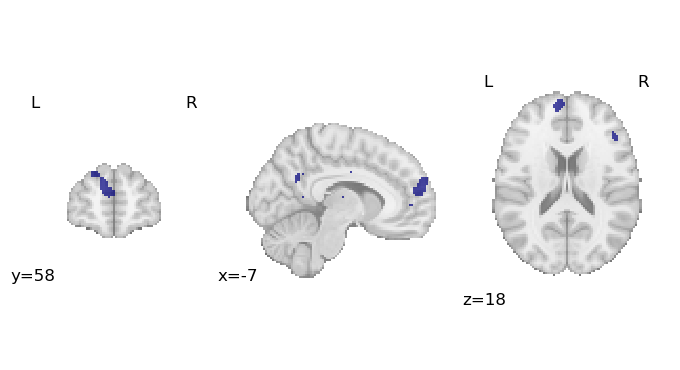

In [ ]:
# # First we'll make an ROI
# # 创建ROI图像，图像仅含0和1两个值，1表示ROI区域
# arr = np.zeros(dset.masker.mask_img.shape, np.int32)
# arr[65:75, 50:60, 50:60] = 1

# # 绘制ROI图像，不显示十字线
# mask_img = nib.Nifti1Image(arr, dset.masker.mask_img.affine)
plot_roi(roi_img_patients, draw_cross=False)

# Get studies with voxels in the mask
# 获取在roi内所有体素的研究
ids = dset.get_studies_by_mask(roi_img_patients)

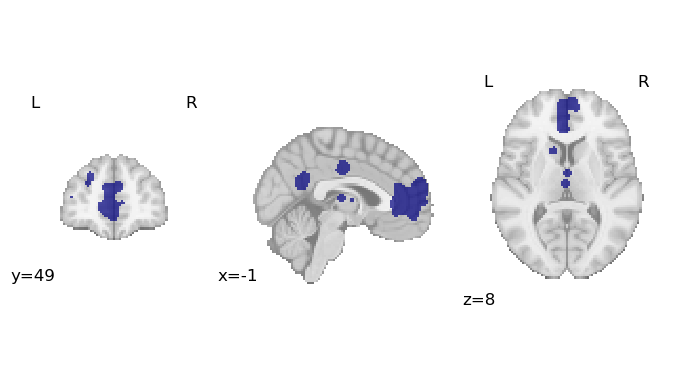

In [24]:
# mask_img = nib.Nifti1Image(arr, dset.masker.mask_img.affine)
plot_roi(roi_img_controls, draw_cross=False)

# Get studies with voxels in the mask
# 获取在roi内所有体素的研究
ids_controls = dset.get_studies_by_mask(roi_img_controls)

In [29]:
# Get studies with voxels in the mask
# 获取在roi内所有体素的研究
ids_patients = dset.get_studies_by_mask(roi_img_patients)


## Decode an ROI image using the Neurosynth chi-square method



对研究ID列表进行解码，适用于需要分析特定研究集合的情况，输出与研究ID相关的特征。

In [25]:
# Run the decoder
# 创建一个解码器，用于将研究的结果转换为概率
decoder = discrete.NeurosynthDecoder(correction=None)
# 进行拟合
decoder.fit(dset)
# 进行解码，对在指定ROI内的研究ID列表（ids）进行解码,返回一个DataFrame（decode_df）
decoded_df = decoder.transform(ids=ids_controls)

decoded_df.sort_values(by="probReverse", ascending=False).head(10)

INFO:nimare.decode.base:Retaining 728/3228 features.


,pForward,zForward,probForward,pReverse,zReverse,probReverse
Term,,,,,,
Neurosynth_TFIDF__affective,0.000003,4.700003,0.818182,0.091195,1.689126,0.611111
Neurosynth_TFIDF__human,0.000003,4.700003,0.818182,0.091195,1.689126,0.611111
Neurosynth_TFIDF__functions,0.000003,4.700003,0.818182,0.091195,1.689126,0.611111
Neurosynth_TFIDF__analyses,0.000003,4.700003,0.818182,0.091195,1.689126,0.611111
Neurosynth_TFIDF__prefrontal,0.000140,3.808801,0.833333,0.139861,1.476309,0.600000
Neurosynth_TFIDF__provide,0.003582,2.912809,0.846154,0.204567,1.268648,0.590909
Neurosynth_TFIDF__lateral,0.003582,2.912809,0.846154,0.204567,1.268648,0.590909
Neurosynth_TFIDF__structure,0.003582,2.912809,0.846154,0.204567,1.268648,0.590909
Neurosynth_TFIDF__function,0.003582,2.912809,0.846154,0.204567,1.268648,0.590909


In [30]:
decoder = discrete.NeurosynthDecoder(correction=None)
# 进行拟合
decoder.fit(dset)
# 进行解码，对在指定ROI内的研究ID列表（ids）进行解码,返回一个DataFrame（decode_df）
decoded_df = decoder.transform(ids=ids_patients)

decoded_df.sort_values(by="probReverse", ascending=False).head(10)

INFO:nimare.decode.base:Retaining 728/3228 features.


,pForward,zForward,probForward,pReverse,zReverse,probReverse
Term,,,,,,
Neurosynth_TFIDF__affective,0.000003,4.700003,0.818182,0.091195,1.689126,0.611111
Neurosynth_TFIDF__human,0.000003,4.700003,0.818182,0.091195,1.689126,0.611111
Neurosynth_TFIDF__functions,0.000003,4.700003,0.818182,0.091195,1.689126,0.611111
Neurosynth_TFIDF__analyses,0.000003,4.700003,0.818182,0.091195,1.689126,0.611111
Neurosynth_TFIDF__prefrontal,0.000140,3.808801,0.833333,0.139861,1.476309,0.600000
Neurosynth_TFIDF__provide,0.003582,2.912809,0.846154,0.204567,1.268648,0.590909
Neurosynth_TFIDF__lateral,0.003582,2.912809,0.846154,0.204567,1.268648,0.590909
Neurosynth_TFIDF__structure,0.003582,2.912809,0.846154,0.204567,1.268648,0.590909
Neurosynth_TFIDF__function,0.003582,2.912809,0.846154,0.204567,1.268648,0.590909



## Decode an ROI image using the Neurosynth ROI association method



直接对ROI图像进行解码，适用于需要直接分析特定脑区的情况，输出与ROI相关的特征。

In [13]:
# This method decodes the ROI image directly, rather than comparing subsets of the Dataset like the
# other two.
decoder = discrete.ROIAssociationDecoder(roi_img)
decoder.fit(dset)

# The `transform` method doesn't take any parameters.
decoded_df = decoder.transform()

decoded_df.sort_values(by="r", ascending=False).head()

INFO:nimare.decode.base:Retaining 728/3228 features.


,r
feature,
Neurosynth_TFIDF__reward,0.723187
Neurosynth_TFIDF__hippocampus,0.682885
Neurosynth_TFIDF__ofc,0.682885
Neurosynth_TFIDF__striatum,0.682885
Neurosynth_TFIDF__involving,0.682885
